1.Import packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
import datetime
import time
import sase1d

2.Input parameters

In [13]:
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 31                        # n-sample points along bunch length
z_steps = 20                        # n-sample points along undulator
energy  = 4313.34                   # electron energy [MeV]
eSpread = 1.0e-4                    # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [mm-mrad]
currentMax = 3900                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
unduK = 3.5                         # undulator parameter, K [ ]
unduL = 30                          # length of undulator [meter]
radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 5                            # 5=SASE, 4=seeded
P0 = 10000*1.0                       # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No

In [14]:
'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed}

3.1D FEL run

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


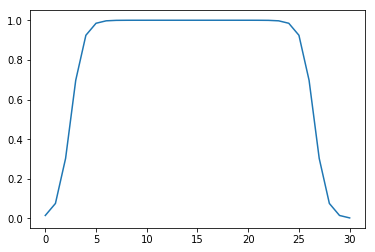

In [15]:
%load_ext autoreload
%autoreload
'''
Use sase function in sase1d.py to run 1D FEL
'''
z,power_z,s,power_s,rho,detune,field,\
field_s,gainLength,resWavelength,\
thet_out,gam_out,bunching,history=sase1d.sase(inp_struct)

4.Print or plot the output

/Users/xiao/miniconda3/envs/cs231n/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


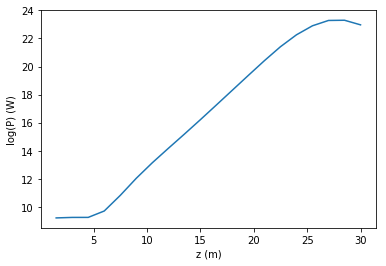

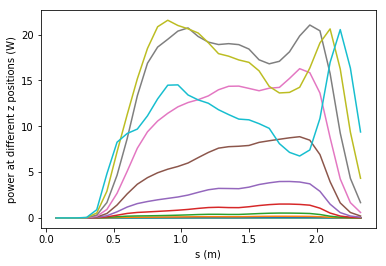

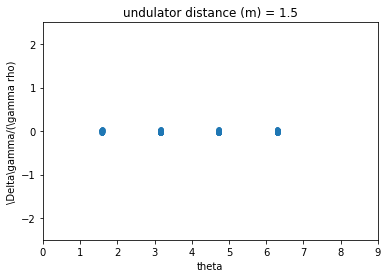

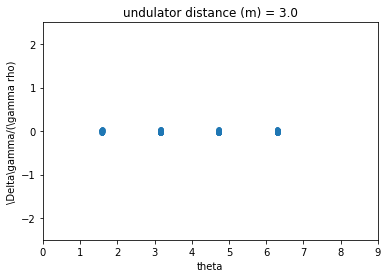

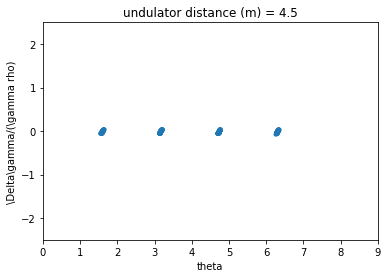

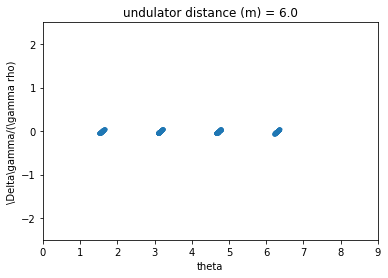

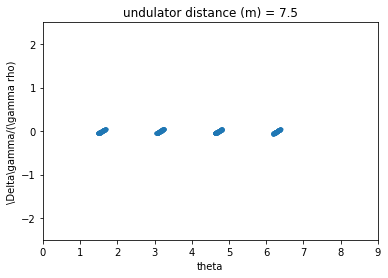

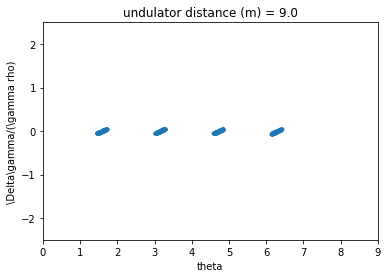

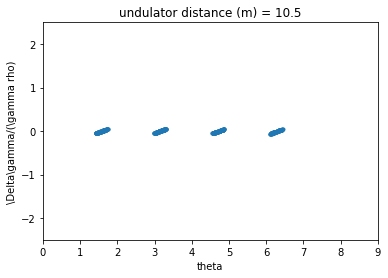

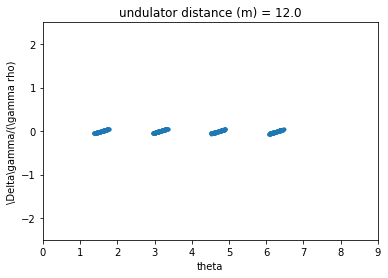

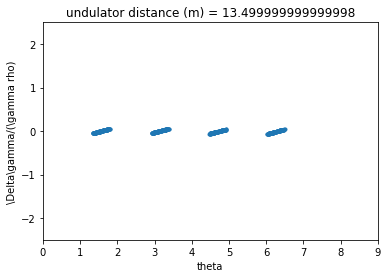

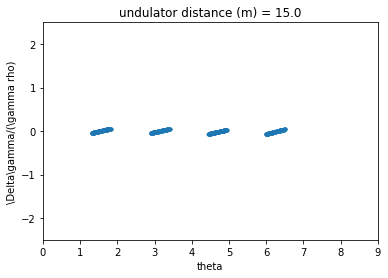

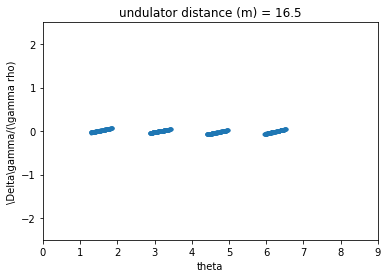

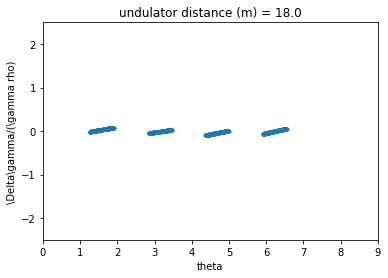

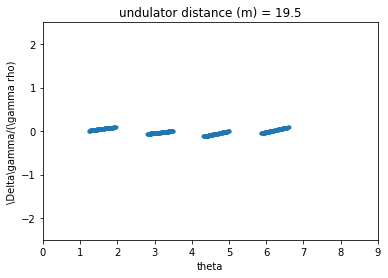

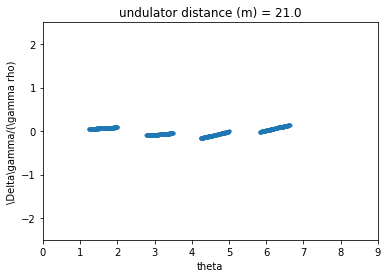

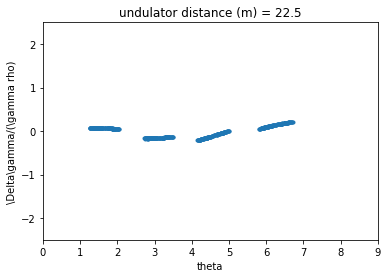

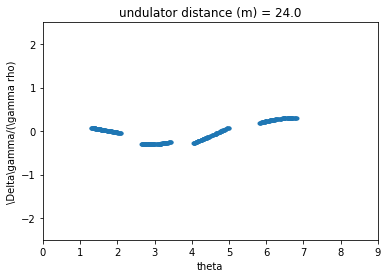

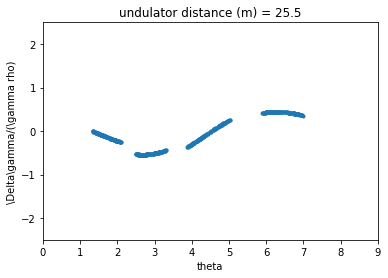

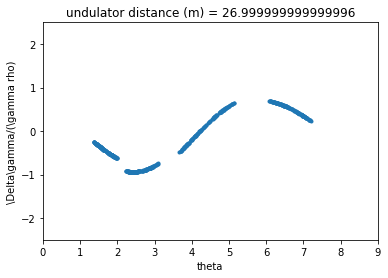

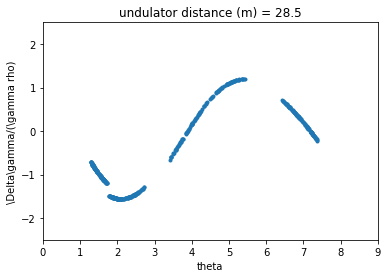

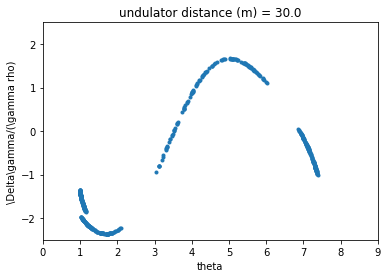

In [16]:
if iopt == 5:
    sase1d.plot_log_power_z(history)
    sase1d.plot_power_s(history)
    sase1d.plot_phase_space(history)
else:
    sase1d.plot_log_power_z(history)
    sase1d.plot_phase_space(history)

In [6]:
print(rho)
print(detune)
print(gainLength)
print(resWavelength)
print(thet_out,gam_out)

0.0009984555210126444
0
2.3910170219272064
1.4999920058175564e-09
[[ 0.02711742  0.00454122 -0.01863719 ... -1.72362454 -2.62779084
  -3.05686388]
 [ 0.07620579  0.05363396  0.03047181 ... -1.75170587 -2.62313781
  -3.0197545 ]
 [ 0.12529489  0.1027296   0.07958732 ... -1.77761099 -2.6167318
  -2.98198604]
 ...
 [-0.07925769 -0.06094859 -0.04325324 ... -1.91460544 -2.64380085
  -2.88754105]
 [-0.03017131 -0.01186301  0.00584151 ... -1.93289762 -2.63265202
  -2.84974938]
 [ 0.01891581  0.03722551  0.05494283 ... -1.94974249 -2.6205841
  -2.81196597]] [[-0.03550386 -0.03646875 -0.03741835 ... -1.82845911 -1.03013321
  -0.3895876 ]
 [-0.0355004  -0.03645604 -0.03737306 ... -1.78422482 -0.97545104
  -0.34304724]
 [-0.03549461 -0.0364387  -0.03732093 ... -1.73967591 -0.92211605
  -0.29866378]
 ...
 [ 0.02967098  0.02869652  0.02772168 ... -1.60621988 -0.7258087
  -0.11684811]
 [ 0.02966842  0.02869913  0.02775476 ... -1.56292501 -0.67903528
  -0.08096049]
 [ 0.02966819  0.02870641  0.027794